# Geo-Python 2024: Итоговое задание

**Исходные данные**: погодные данные дневных температур с января 1908 года по октябрь 2020 года с метеостанции Сондакюла, расположенной в северной части Финляндии.

**Цель**: осуществить расчёт и визуализацию сезонных температур из набора данных за 1993 год.
    
**Задача**: рассчитать средние температуры за зиму, весну, лето и осень за 1993 год, а также вывести график годовой температуры.
    
**Алгоритм реализации задачи**:
1. Прочесть данный файл с помощью pandas и преобразовать отсутствующие значения в NA.
2. Заменить значения NA в колонке `TAVG` рассчитанными осреднёнными значениями дневной температуры. Допускается удаление значений, которые будут отсутствовать даже после этой операции.
3. Задать и использовать функцию преобразования температур `TAVG`, `TMAX` и `TMIN` из Фаренгейта в Цельсии, сохранив конвертированные значения в новые колонки. **Важно** не перезаписывать существующие значения! Конвертацию произвести по следующей формуле:

$$
\Large
\begin{equation}
  T_{\mathrm{Celsius}} = (T_{\mathrm{Fahrenheit}} - 32)~/~1.8
\end{equation}
$$

4. Выбрать данные по четырём сезонам за 1993 год и записать их в переменные `temps_winter`, `temps_spring`, `temps_summer` и `temps_autumn`.  

    - Сезоны должны включать следующие месяцы:

        - Зима: декабрь, январь, февраль
        - Весна: март, апрель, май
        - Лето: июнь, июль, август
        - Осень: сентябрь, октябрь, ноябрь

5. Рассчитать среднюю температуру за каждый сезон и вывести значения на экран, округлив до целого числа.
6. Построить график(и) температур за каждый сезон.

In [1]:
# Импорт библиотеки pandas
import pandas as pd
# Импорт библиотеки matplotlib для визуализации данных
import matplotlib.pyplot as plt 
# Загрузка данных из файла (2315676.txt)
data = pd.read_csv('https://raw.githubusercontent.com/AlenaKrasikova/Python-Beginner-1/master/Final/data/2315676.txt' 
                   , sep='\s+'
                   , na_values=[-9999]
                   , parse_dates=['DATE']
                   , date_format='%Y%m%d'
                   #, index_col="DATE"
                   , skiprows=[1])

In [2]:
# Вызов 5 первых строк DataFrame
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-01,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-02,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-03,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-04,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-05,NaN,4.0,-36.0


In [3]:
# Замена отсутствующих значений в колонке TAVG на основе колонок TMAX и TMIN
data['TAVG'] = data['TAVG'].fillna((data['TMAX'] + data['TMIN'])/2)

In [4]:
# Проверка данных методом info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41065 entries, 0 to 41064
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   STATION       41065 non-null  object        
 1   STATION_NAME  41065 non-null  object        
 2   DATE          41065 non-null  datetime64[ns]
 3   TAVG          40882 non-null  float64       
 4   TMAX          40296 non-null  float64       
 5   TMIN          39119 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.9+ MB


In [5]:
# Получение сводки числовых значений датасета
data.describe()

,DATE,TAVG,TMAX,TMIN
count,41065,40882.000000,40296.000000,39119.000000
mean,1964-05-23 03:16:58.064044768,30.878675,39.034296,22.315985
min,1908-01-01 00:00:00,-53.000000,-47.000000,-57.000000
25%,1936-03-05 00:00:00,17.500000,26.000000,9.000000
50%,1964-06-11 00:00:00,32.500000,38.000000,27.000000
75%,1992-07-20 00:00:00,47.000000,55.000000,39.000000
max,2020-10-07 00:00:00,78.000000,90.000000,67.000000
std,NaN,20.910897,20.905912,22.187090


In [6]:
# Подсчёт пропусков
data['TAVG'].isna().sum() 

183

In [7]:
# Срез данных с пропущенными значениями
data.loc[data['TAVG'].isna()]

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
12,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-13,NaN,25.0,NaN
13,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-14,NaN,26.0,NaN
36,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-02-06,NaN,31.0,NaN
46,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-02-16,NaN,15.0,NaN
62,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-03-03,NaN,24.0,NaN
...,...,...,...,...,...,...
7216,GHCND:FI000007501,SODANKYLA-AWS-FI,1927-10-29,NaN,NaN,-14.0
8356,GHCND:FI000007501,SODANKYLA-AWS-FI,1930-12-12,NaN,15.0,NaN
9044,GHCND:FI000007501,SODANKYLA-AWS-FI,1932-10-30,NaN,NaN,-8.0
13382,GHCND:FI000007501,SODANKYLA-AWS-FI,1944-09-15,NaN,NaN,43.0


In [8]:
# Удаление строк, которые не имеют данных в колонке TAVG
data = data.dropna(subset = ['TAVG'])

In [9]:
# Проверка данных методом info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40882 entries, 0 to 41064
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   STATION       40882 non-null  object        
 1   STATION_NAME  40882 non-null  object        
 2   DATE          40882 non-null  datetime64[ns]
 3   TAVG          40882 non-null  float64       
 4   TMAX          40206 non-null  float64       
 5   TMIN          39026 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.2+ MB


In [10]:
# Функция преобразования температуры из Фаренгейта в Цельсий
def fahr_to_celsius(temp_fahrenheit):
    converted_temp = round((temp_fahrenheit - 32) / 1.8,1)
    return converted_temp

In [11]:
# Расчет значений в Цельсиях с использованием метода apply и функции конвертации
data['TAVG_°C'] = data['TAVG'].apply(fahr_to_celsius)
data['TMAX_°C'] = data['TMAX'].apply(fahr_to_celsius)
data['TMIN_°C'] = data['TMIN'].apply(fahr_to_celsius)

In [12]:
# Выбор данных по четырём сезонам за 1993 год с помощью методов loc() и between()
temps_winter = data.loc[data['DATE'].between ('1992-12-01','1993-02-28')]
temps_spring = data.loc[data['DATE'].between ('1993-03-01','1993-05-31')]
temps_summer = data.loc[data['DATE'].between ('1993-06-01','1993-08-31')]
temps_autumn = data.loc[data['DATE'].between ('1993-09-01','1993-11-30')]

In [13]:
# Рассчет средних температур за каждый сезон 1993 г.
mean_winter = temps_winter['TAVG_°C'].mean()
mean_spring = temps_spring['TAVG_°C'].mean()
mean_summer = temps_summer['TAVG_°C'].mean()
mean_autumn = temps_autumn['TAVG_°C'].mean()

# Вывод результатов
print(f"Средняя зимняя температура в 1993 году: {mean_winter:2.0f}")
print(f"Средняя весенняя температура в 1993 году: {mean_spring:2.0f}")
print(f"Средняя летняя температура в 1993 году: {mean_summer:2.0f}")
print(f"Средняя осенняя температура в 1993 году: {mean_autumn:2.0f}")

Средняя зимняя температура в 1993 году: -8
Средняя весенняя температура в 1993 году: -1
Средняя летняя температура в 1993 году: 11
Средняя осенняя температура в 1993 году: -2


In [14]:
# Перевод временных значений в индекс для отображения на графиках
temps_winter = temps_winter.set_index('DATE')
temps_spring = temps_spring.set_index('DATE')
temps_summer = temps_summer.set_index('DATE')
temps_autumn = temps_autumn.set_index('DATE')

Text(0.5, 1.0, 'График температур по сезонам 1993 г.')

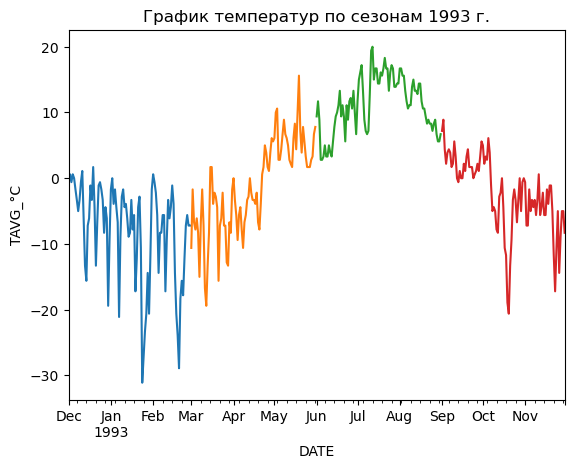

In [15]:
#График температур за каждый сезон 1993 г.
temps_winter['TAVG_°C'].plot(ylabel = 'TAVG_°C')
temps_spring['TAVG_°C'].plot(ylabel = 'TAVG_°C')
temps_summer['TAVG_°C'].plot(ylabel = 'TAVG_°C')
temps_autumn['TAVG_°C'].plot(ylabel = 'TAVG_°C')
plt.title('График температур по сезонам 1993 г.')